In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
aineisto = pd.read_excel("C:/Users/testi/Desktop/excel_files/CCPP.xlsx")

In [4]:
aineisto.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
x = aineisto.drop(["PE"], axis=1).values

In [8]:
print(x)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [9]:
y = aineisto["PE"].values

In [11]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Jaetaan aineisto treeni- ja testiosiin. Käytin 70/30 -jakoa.

In [19]:
print(len(x_train))
print(len(y_train))

6697
6697


In [21]:
print(len(x_test))
print(len(y_test))

2871
2871


In [23]:
model = LinearRegression().fit(x_train, y_train)    # train the model

In [24]:
y_pred = model.predict(x_test)

In [25]:
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [26]:
R2 = r2_score(y_test, y_pred)

In [28]:
print(R2)     # 93 % vastemuuttujan varianssista voidaan selittää selittävien muuttujien avulla.

0.9304112159477683


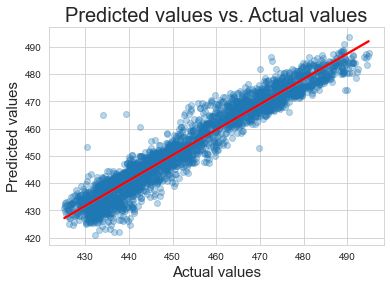

In [39]:
fig = plt.figure()
sns.set_style("whitegrid")

sns.regplot(x=y_test, y=y_pred, 
            scatter_kws={"alpha":0.3}, 
            line_kws={"color": "red"})

plt.title("Predicted values vs. Actual values", size=20)
plt.xlabel("Actual values", size=15)
plt.ylabel("Predicted values", size=15)
plt.show()

In [40]:
df = pd.DataFrame({"Actual value": y_test, 
                   "Predicted value": y_pred, 
                   "Difference": y_test - y_pred})

In [43]:
df.head(15)

,Actual value,Predicted value,Difference
0,431.23,431.402451,-0.172451
1,460.01,458.614741,1.395259
2,461.14,462.819674,-1.679674
3,445.90,448.601237,-2.701237
4,451.29,457.879479,-6.589479
5,432.68,429.676856,3.003144
6,477.50,473.017115,4.482885
7,459.68,456.532373,3.147627
8,477.50,474.342524,3.157476
9,444.99,446.364396,-1.374396
